<a href="https://colab.research.google.com/github/trancedu/FRELSTM/blob/main/Copy_of_bert_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
!pip install sentence_transformers
!pip install d2l==0.17.0
import d2l
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
sentence_model = SentenceTransformer('stsb-distilbert-base')

In [229]:
# 这一步是加载数据，如果在本地，这一步不需要跑
# 或者直接 colab 上传数据即可
from google.colab import drive
drive.mount('/content/drive')
!cp drive/MyDrive/files/analyst_return_industry.csv .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
!cp drive/MyDrive/files/stock_return.csv .

In [231]:
df_returns = pd.read_csv("stock_return.csv")
df_returns.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,...,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,2018-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-03 00:00:00,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.017300,0.002211,0.004615,0.018796,0.012406,-0.007732,0.010863,0.021098,-0.005138,-0.008424,-0.000919,0.002956,0.011092,0.002822,0.007560,0.005796,0.001977,0.029294,-0.004666,0.000589,0.004255,0.017722,0.0,0.051913,0.008797,0.018870,-0.004944,0.003897,0.012775,0.019781,0.019320,0.013938,0.015971,...,0.009955,-0.008600,0.000507,0.005280,0.018351,-0.002845,-0.002922,0.013063,-0.005886,0.006024,0.000696,-0.020549,-0.008079,0.010629,0.007472,0.015852,-0.003497,0.001718,0.007694,0.005060,0.018709,0.014518,0.027617,0.008723,-0.008281,0.010663,0.001206,-0.000524,0.008782,-0.010834,-0.006693,0.020036,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2,2018-01-04 00:00:00,-0.007501,0.006305,0.036899,0.004645,-0.005703,-0.002225,0.017516,-0.001697,0.011841,0.012042,-0.001094,0.016843,0.009552,0.024593,-0.011362,-0.011838,-0.003680,0.010314,0.003990,0.005426,0.009259,-0.005156,-0.011913,0.009083,-0.010849,-0.011571,0.013956,0.005743,0.0,0.049351,0.008039,-0.004214,0.003667,-0.014610,0.004476,-0.012351,0.002642,0.004626,0.013699,...,0.003718,0.022770,-0.020270,0.003216,-0.006776,-0.029832,0.005024,0.005140,0.006973,-0.024451,0.027121,0.003242,0.013494,0.009557,-0.051781,-0.006048,-0.003509,-0.021515,0.012508,-0.000119,0.010151,0.008586,0.017188,0.000905,0.004031,0.025076,-0.000301,0.019926,-0.008144,0.005415,-0.007791,0.018053,0.001384,-0.000149,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
3,2018-01-05 00:00:00,0.015989,-0.000380,0.010631,0.011385,0.017408,0.012104,0.015408,0.002890,0.008249,0.011571,0.004052,-0.006675,-0.000591,-0.010975,-0.000696,-0.002114,0.003694,0.006619,0.004139,0.012594,0.004587,0.003506,0.011519,0.033305,-0.001490,0.010615,0.002458,0.005710,0.0,-0.019802,-0.002568,0.005958,0.003418,0.006446,0.016163,0.017534,0.004150,0.017940,0.008492,...,0.023949,0.003180,-0.007241,0.004701,-0.011096,0.008556,0.008851,0.013726,0.017116,-0.005115,0.005191,-0.002281,-0.018472,0.012872,0.018435,0.006328,-0.006737,-0.006214,0.006738,-0.002014,0.006413,-0.001249,-0.002765,0.005927,-0.004158,0.004027,0.012551,0.059126,-0.001415,0.006671,-0.007003,0.051922,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
4,2018-01-08 00:00:00,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,0.027086,-0.002882,0.007991,-0.001619,0.001746,-0.002240,-0.003043,0.005233,0.011849,0.008757,0.000000,0.002563,-0.006595,-0.015892,0.000630,0.000759,0.043501,0.032480,-0.013426,-0.004712,-0.004045,0.024176,0.0,0.033670,0.006640,-0.000277,0.010160,0.010676,0.014425,0.060354,0.008265,-0.010753,0.000073,...,0.004038,0.021929,-0.014241,0.002021,0.015466,-0.011399,0.001239,0.011593,0.007708,0.001714,0.000449,-0.001715,0.006599,0.012511,0.012754,-0.015117,0.008633,0.003527,-0.011315,0.003383,-0.005386,0.000682,0.003697,0.014781,-0.005040,0.006686,0.005653,0.043204,0.006521,-0.013314,0.007480,0.006608,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011996


In [232]:
data = pd.read_csv("analyst_return_industry.csv").iloc[:, 1:]
# change to 0 and 1
data['y'] = (data['return+1'] >= 0).astype(int)

In [233]:
def bert_sentence_encoding(sentences, model):
    # this takes a while!
    embedded_sentences = model.encode(sentences)
    assert len(embedded_sentences) == len(sentences)
    
    return embedded_sentences

In [284]:
df = data[:10000].copy()
text = df['title'].tolist()
label = df['y'].tolist()
bert_w2vec_text = np.array(bert_sentence_encoding(text, sentence_model))
df['bert'] = bert_w2vec_text.tolist()

stock_col_index = df.columns.tolist().index('stock')
bert_col_index = df.columns.tolist().index('bert')
title_col_index = df.columns.tolist().index('title')
def get_last_n_bert(index, n=20, target_col_index=0):
    if not isinstance(index, int):
        index = index.name
    if df.iloc[index - n, stock_col_index] == df.iloc[index, stock_col_index]:
        return np.vstack(df.iloc[index - n: index, target_col_index])
    return

def get_last_n_title(index, n=20, target_col_index=0):
    if not isinstance(index, int):
        index = index.name
    if df.iloc[index - n, stock_col_index] == df.iloc[index, stock_col_index]:
        return df.iloc[index - n: index, target_col_index].tolist()
    return  

In [287]:
# df.to_csv('bert_result_10000.csv', index=False)

In [288]:
# !cp bert_result_10000.csv drive/MyDrive/files/

In [235]:
# df['bert_last_20'] = df.apply(get_last_n_bert, args=(20, bert_col_index), axis=1)



In [236]:
# df['news_last_20'] = df.apply(get_last_n_title, args=(20, title_col_index), axis=1)

In [ ]:
# df.to_csv("analyst_return_last_20.csv", index=False)
# !cp analyst_return_last_20.csv drive/MyDrive/files/

In [237]:
df

,title,date,stock,Date,Date+1,Date+3,Date+5,return+1,return+3,return+5,y,ticker,industry,bert,bert_last_20,news_last_20
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00,A,2020-06-05,2020-06-08,2020-06-10,2020-06-12,-0.000996,0.000446,0.012701,0,A,Healthcare,"[0.5953495502471924, -0.8153849244117737, -0.4...",None,None
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00,A,2020-06-03,2020-06-04,2020-06-08,2020-06-10,0.007183,-0.000996,0.000446,1,A,Healthcare,"[0.4019782245159149, -0.7736400961875916, -0.4...",None,None
2,71 Biggest Movers From Friday,2020-05-26 04:30:00,A,2020-05-26,2020-05-27,2020-05-29,2020-06-02,0.000581,0.016726,0.004227,1,A,Healthcare,"[0.4063955843448639, 0.2997133731842041, 1.119...",None,None
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00,A,2020-05-22,2020-05-26,2020-05-28,2020-06-01,0.013532,0.005918,0.020082,1,A,Healthcare,"[-0.044870033860206604, -0.5282055139541626, 0...",None,None
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00,A,2020-05-22,2020-05-26,2020-05-28,2020-06-01,0.013532,0.005918,0.020082,1,A,Healthcare,"[-0.0015827291645109653, 0.20506562292575836, ...",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Morgan Stanley Maintains Equal-Weight on Avery...,2020-03-18 08:52:00,AVY,2020-03-18,2020-03-19,2020-03-23,2020-03-25,-0.022852,-0.132709,0.010335,0,AVY,Industrials,"[-1.3821346759796143, 0.31027260422706604, 0.2...",None,None
9996,"Citigroup Maintains Neutral on Avery Dennison,...",2020-03-11 07:44:00,AVY,2020-03-11,2020-03-12,2020-03-16,2020-03-18,-0.060573,-0.085501,-0.011714,0,AVY,Industrials,"[-0.3668907582759857, 0.44470107555389404, -0....",None,None
9997,"UBS Maintains Buy on Avery Dennison, Lowers Pr...",2020-03-10 07:09:00,AVY,2020-03-10,2020-03-11,2020-03-13,2020-03-17,-0.078265,0.017847,0.099990,0,AVY,Industrials,"[-1.3419853448867798, 0.6894689202308655, 0.07...",None,None
9998,Shares of several industrial and shipping comp...,2020-02-24 08:42:00,AVY,2020-02-24,2020-02-25,2020-02-27,2020-03-02,-0.046378,-0.039636,0.048214,0,AVY,Industrials,"[0.060678571462631226, -0.23091216385364532, 0...",None,None


In [238]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier

# df = data[data.industry == "Healthcare"][:50000]
# text = df['title'].tolist()
# label = df['y'].tolist()
# all_labels = [0, 1]
# print("All labels are: {}".format(all_labels))
# X_train, X_test, y_train, y_test = train_test_split(text, 
#                                                     label, 
#                                                     test_size=0.2, 
#                                                     random_state=42)

# print(len(X_train))

In [ ]:
# # re-vectorize the Xs - make sure to specify the right size for the embeddings
# bert_w2vec_X_train = np.array(bert_sentence_encoding(X_train, sentence_model))
# bert_w2vec_X_test = np.array(bert_sentence_encoding(X_test, sentence_model))
# print(bert_w2vec_X_train[0].shape)

(768,)


### Utils Functions

In [239]:
from sklearn.metrics import confusion_matrix, classification_report

def calculate_confusion_matrix_and_report(y_predicted, y_golden, with_plot=True):
    # calculate confusion matrix: 
    cm = confusion_matrix(y_golden, y_predicted)
    # build a readable report;
    # https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
    print('\nClassification Report')
    print(classification_report(y_golden, y_predicted))
    # plot the matrix
    if with_plot:
        plot_confusion_matrix(cm)
                                          
    return
                                          
def plot_confusion_matrix(c_matrix):
    plt.imshow(c_matrix, cmap=plt.cm.Blues)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title("Confusion matrix")
    plt.colorbar()
    plt.show()
    
    return

In [240]:
%matplotlib inline
import torch
from torch import nn 
from d2l import torch as d2l
import torch.nn.functional as F

import torch.utils.data as Data

# BATCH_SIZE = 20

# torch_train_dataset = Data.TensorDataset(torch.from_numpy(bert_w2vec_X_train), torch.tensor(y_train))
# train_iter = Data.DataLoader(
#     dataset=torch_train_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=True,
#     num_workers=0,
# )
# torch_test_dataset = Data.TensorDataset(torch.from_numpy(bert_w2vec_X_train), torch.tensor(y_train))
# test_iter = Data.DataLoader(
#     dataset=torch_test_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=True,
#     num_workers=0,
# )

In [241]:
# X = df[df['stock'] == 'A']['bert']
# y = df['return+1']

In [242]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [243]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 5 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [244]:
corpus = bert_w2vec_text

In [245]:
corpus[2:5]

array([[ 0.40639558,  0.29971337,  1.119453  , ...,  0.39965776,
         0.1909937 , -0.8793637 ],
       [-0.04487003, -0.5282055 ,  0.329313  , ...,  0.00561001,
        -0.03012734, -0.63683784],
       [-0.00158273,  0.20506562,  0.02600296, ...,  0.7005896 ,
        -0.12340715, -0.9611118 ]], dtype=float32)

In [253]:
target = df['y']

In [311]:
df.groupby('stock').tail(20)

,title,date,stock,Date,Date+1,Date+3,Date+5,return+1,return+3,return+5,y,ticker,industry,bert
226,Evercore ISI Group Initiates Coverage On Agile...,2018-01-04 08:41:00,A,2018-01-04,2018-01-05,2018-01-09,2018-01-11,0.015989,0.024554,0.000141,1,A,Healthcare,"[0.10360626131296158, 0.37266775965690613, 1.0..."
227,Goldman Sachs Healthcare CEOs Unscripted Confe...,2018-01-04 06:54:00,A,2018-01-04,2018-01-05,2018-01-09,2018-01-11,0.015989,0.024554,0.000141,1,A,Healthcare,"[0.06882817298173904, 0.3872598707675934, 0.49..."
471,"10 Stocks To Watch For February 21, 2018",2018-02-21 04:26:00,AAP,2018-02-21,2018-02-22,2018-02-26,2018-02-28,-0.030790,-0.012638,0.040528,0,AAP,Consumer Cyclical,"[0.24185048043727875, 0.3554683029651642, -0.0..."
472,"Earnings Scheduled For February 21, 2018",2018-02-21 04:00:00,AAP,2018-02-21,2018-02-22,2018-02-26,2018-02-28,-0.030790,-0.012638,0.040528,0,AAP,Consumer Cyclical,"[0.48564666509628296, 0.4989309310913086, 0.26..."
940,Investor Movement Index Summary: February 2020,2020-03-09 13:57:00,AAPL,2020-03-09,2020-03-10,2020-03-12,2020-03-16,0.072022,-0.098755,-0.128647,1,AAPL,Technology,"[-0.17972013354301453, 0.13271191716194153, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9248,AvalonBay Communities Reports Q4 FFO $2.18 vs ...,2018-01-31 16:21:00,AVB,2018-01-31,2018-02-01,2018-02-05,2018-02-07,-0.036913,-0.030129,-0.012293,0,AVB,Real Estate,"[0.17099061608314514, 0.09733965247869492, 0.8..."
9986,KeyBanc: Apple Supplier Cirrus Logic Has 'Limi...,2018-01-08 09:26:00,AVGO,2018-01-08,2018-01-09,2018-01-11,2018-01-16,-0.013847,0.002549,-0.003935,0,AVGO,Technology,"[-0.956243097782135, 0.537670910358429, -0.437..."
9987,Broadcom Sends Letter To Qualcomm Stockholders...,2018-01-05 16:26:00,AVGO,2018-01-05,2018-01-08,2018-01-10,2018-01-12,0.002393,-0.021117,0.002998,1,AVGO,Technology,"[0.42810913920402527, 0.5380608439445496, 0.38..."
9998,Shares of several industrial and shipping comp...,2020-02-24 08:42:00,AVY,2020-02-24,2020-02-25,2020-02-27,2020-03-02,-0.046378,-0.039636,0.048214,0,AVY,Industrials,"[0.060678571462631226, -0.23091216385364532, 0..."


In [308]:
stock_length = df.groupby('stock')['title'].count().cumsum().to_frame()
stock_lengths = pd.concat([stock_length.shift(1).fillna(0).astype(int), stock_length-40, stock_length-20, stock_length], axis=1)
stock_lengths.columns = ['train_start', 'train_end', 'test_start', 'test_end']
stock_lengths

,train_start,train_end,test_start,test_end
stock,,,,
A,0,188,208,228
AAP,228,433,453,473
AAPL,473,902,922,942
ABBV,942,1232,1252,1272
ABC,1272,1437,1457,1477
ABMD,1477,1507,1527,1547
ACN,1547,1821,1841,1861
ADBE,1861,2342,2362,2382
ADI,2382,2641,2661,2681


In [313]:
# ((stock_lengths['train_start'] <= 3095) & (stock_lengths['train_end'] > 3095)).sum() != 1

1

In [ ]:
# def valid_i(i):
#     for 
#     stock_lengths['train_start']

In [455]:
# df

In [327]:
# ((i >= stock_lengths['train_start']) & (i < stock_lengths['train_end'])).sum()

1

In [383]:
import random
def seq_data_iter_sequential(corpus, target, batch_size, num_steps, train=True): 
    """使用顺序分区生成一个小批量子序列。"""
    # 从随机偏移量开始划分序列
    offset = random.randint(0, num_steps)
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    Xs = torch.tensor(corpus[offset: offset + num_tokens])
    # Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])
    Ys = torch.tensor(target[offset: offset + num_tokens].values)
    Xs, Ys = Xs.reshape(batch_size, -1, corpus.shape[-1]), Ys.reshape(batch_size, -1, 1)
    num_batches = Xs.shape[1] // num_steps
    for i in range(0, num_steps * num_batches, num_steps):
        if train:
            if ((i >= stock_lengths['train_start']) & (i < stock_lengths['train_end'])).sum() != 1:
                continue
        else:
            if ((i >= stock_lengths['train_end']) & (i < stock_lengths['test_start'])).sum() != 1:
                continue
        X = Xs[:, i: i + num_steps]
        Y = Ys[:, i: i + num_steps].reshape(-1, 1)
        yield X, Y


class SeqDataLoader:
    def __init__(self, corpus, target, batch_size, num_steps, train=True):
        self.corpus = corpus
        self.batch_size = batch_size 
        self.num_steps = num_steps
        self.target = target
        self.train = train
    def __iter__(self):
        return seq_data_iter_sequential(self.corpus, self.target, self.batch_size, self.num_steps, self.train)

In [384]:
train_iter = SeqDataLoader(corpus, target, batch_size, num_steps, train=True)
for i, (X, y) in enumerate(train_iter):
  print(i, X.shape, y.shape)
  break
  
test_iter = SeqDataLoader(corpus, target, batch_size, num_steps, train=False)
for i, (X, y) in enumerate(test_iter):
  print(i, X.shape, y.shape)
  break

0 torch.Size([10, 20, 768]) torch.Size([200, 1])
0 torch.Size([10, 20, 768]) torch.Size([200, 1])


In [385]:

class RNNModel(nn.Module):
    """The RNN model."""
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size
        # If the RNN is bidirectional (to be introduced later),
        # `num_directions` should be 2, else it should be 1.
        if not self.rnn.bidirectional:
            self.num_directions = 1
            self.linear = nn.Linear(self.num_hiddens, self.vocab_size)
        else:
            self.num_directions = 2
            self.linear = nn.Linear(self.num_hiddens * 2, self.vocab_size)
        self.linear2 = nn.Linear(self.vocab_size, 2)

    def forward(self, inputs, state):
        # X = F.one_hot(inputs.T.long(), self.vocab_size)
        # X = X.to(torch.float32)
        X = inputs
        X = X.to(torch.float32).reshape(X.shape[1], X.shape[0], -1)
        # print("X", X.shape)
        Y, state = self.rnn(X, state)
        # print("Y", Y.shape)
        # The fully connected layer will first change the shape of `Y` to
        # (`num_steps` * `batch_size`, `num_hiddens`). Its output shape is
        # (`num_steps` * `batch_size`, `vocab_size`).
        output = self.linear(Y.reshape((-1, Y.shape[-1])))
        # print("output", output.shape)
        output = self.linear2(output)
        output = torch.sigmoid(output)
        return output, state

    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            # `nn.GRU` takes a tensor as hidden state
            return torch.zeros((self.num_directions * self.rnn.num_layers,
                                batch_size, self.num_hiddens), device=device)
        else:
            # `nn.LSTM` takes a tuple of hidden states
            return (torch.zeros((self.num_directions * self.rnn.num_layers,
                                 batch_size, self.num_hiddens),
                                device=device),
                    torch.zeros((self.num_directions * self.rnn.num_layers,
                                 batch_size, self.num_hiddens),
                                device=device))

device = d2l.try_gpu()
num_inputs = 768
num_hiddens = 30
lstm_layer = nn.LSTM(num_inputs, num_hiddens)
model = RNNModel(lstm_layer, num_inputs)
model = model.to(device)

In [386]:
# import random
# def seq_data_iter_sequential(corpus, batch_size, num_steps): 
#     """使用顺序分区生成一个小批量子序列。"""
#     # 从随机偏移量开始划分序列
#     offset = random.randint(0, num_steps)
#     num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
#     Xs = torch.tensor(corpus[offset: offset + num_tokens])
#     Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])
#     Xs, Ys = Xs.reshape(batch_size, -1, corpus.shape[-1]), Ys.reshape(batch_size, -1, corpus.shape[-1])
#     num_batches = Xs.shape[1] // num_steps
#     for i in range(0, num_steps * num_batches, num_steps):
#         X = Xs[:, i: i + num_steps]
#         Y = Ys[:, i: i + num_steps].reshape((-1, Ys.shape[-1]))
#         yield X, Y
        

# import random
# def seq_data_iter_sequential(corpus, target, batch_size, num_steps): 
#     """使用顺序分区生成一个小批量子序列。"""
#     # 从随机偏移量开始划分序列
#     offset = random.randint(0, num_steps)
#     num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
#     Xs = torch.tensor(corpus[offset: offset + num_tokens])
#     # Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])
#     Ys = torch.tensor(target[offset: offset + num_tokens].values)
#     Xs, Ys = Xs.reshape(batch_size, -1, corpus.shape[-1]), Ys.reshape(batch_size, -1, 1)
#     num_batches = Xs.shape[1] // num_steps
#     for i in range(0, num_steps * num_batches, num_steps):
#         X = Xs[:, i: i + num_steps]
#         Y = Ys[:, i: i + num_steps].reshape(-1, 1)
#         yield X, Y

# class SeqDataLoader:
#     def __init__(self, corpus, batch_size, num_steps):
#         self.corpus = corpus
#         self.batch_size = batch_size 
#         self.num_steps = num_steps
#     def __iter__(self):
#         return seq_data_iter_sequential(self.corpus, self.batch_size, self.num_steps)


# class SeqDataLoader:
#     def __init__(self, corpus, target, batch_size, num_steps):
#         self.corpus = corpus
#         self.batch_size = batch_size 
#         self.num_steps = num_steps
#         self.target = target
#     def __iter__(self):
#         return seq_data_iter_sequential(self.corpus, self.target, self.batch_size, self.num_steps)


In [387]:
# batch_size = 10
# num_steps = 20
# train_iter = SeqDataLoader(corpus, target, batch_size, num_steps)
# for i, (X, y) in enumerate(train_iter):
#   print(i, X.shape, y.shape)
#   break

0 torch.Size([10, 20, 768]) torch.Size([200, 1])


In [450]:
batch_size = 10
num_steps = 20
lr = 0.1
device = d2l.try_gpu()
num_inputs = 768
num_hiddens = 30

train_iter = SeqDataLoader(corpus, target, batch_size, num_steps)
lstm_layer = nn.LSTM(num_inputs, num_hiddens)
model = RNNModel(lstm_layer, num_inputs)
model = model.to(device)
# d2l.train_ch8(model, train_iter, corpus, lr, num_epochs, device)

In [451]:
def train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter):
    """Train a net within one epoch (defined in Chapter 8)."""
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(3)  # Sum of training loss, no. of tokens
    counter = 0
    # print(counter)
    for X, Y in train_iter:
        counter += 1
        # print("counter:", counter)
        # print("X", X)
        # print("*" * 30)
        # print("Y", d2l.size(Y))
        if state is None or use_random_iter:
            # Initialize `state` when either it is the first iteration or
            # using random sampling
            state = net.begin_state(batch_size=X.shape[0], device=device)
        else:
            if isinstance(net, nn.Module) and not isinstance(state, tuple):
                # `state` is a tensor for `nn.GRU`
                state.detach_()
            else:
                # `state` is a tuple of tensors for `nn.LSTM` and
                # for our custom scratch implementation
                for s in state:
                    s.detach_()
        # y = Y.T.reshape(-1)
        y = Y.reshape(-1)
        # print("y", y.shape)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)
        y_pred = torch.argmax(y_hat, dim=1).reshape(y.shape)
        cmp = d2l.astype(y_pred, y.dtype) == y
        right_prediction = cmp.sum()

        # print("y", y, "y_hat", y_hat)
        # print("y shape", y.shape, "y_hat shape", y_hat.shape)
        # print("y type", y.dtype, "y_hat type", y_hat.dtype)
        # break
        l = loss(y_hat, y).mean()
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            d2l.grad_clipping(net, 1)
            updater.step()
        else:
            l.backward()
            d2l.grad_clipping(net, 1)
            # Since the `mean` function has been invoked
            updater(batch_size=1)
        metric.add(l * d2l.size(y), d2l.size(y), right_prediction)
        # print("size y", d2l.size(y))

    # print("metric", metric[0], metric[1], metric[2])
    return metric[0] / metric[1], metric[1] / timer.stop(), metric[2] / metric[1]


def train_ch8(net, train_iter, test_iter, vocab, lr, num_epochs, device,
              use_random_iter=False):
    """Train a model (defined in Chapter 8)."""
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity',
                            legend=['train loss','train acc', 'test acc'], xlim=[10, num_epochs])
    # Initialize
    if isinstance(net, nn.Module):
        updater = torch.optim.SGD(net.parameters(), lr)
    else:
        updater = lambda batch_size: d2l.sgd(net.params, lr, batch_size)
    # Train and predict
    for epoch in range(num_epochs):
        ppl, speed, train_accuracy = train_epoch_ch8(net, train_iter, loss, updater, device,
                                     use_random_iter)
        test_accuracy = evaluate_accuracy(net, test_iter, device)
        if (epoch + 1) % 10 == 0:
            animator.add(epoch + 1, [ppl, train_accuracy, test_accuracy])



In [452]:
def evaluate_accuracy(net, data_iter, device):
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)
    state = net.begin_state(batch_size=10, device=device)
    outputs = []

    with torch.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            y_pred, state = net(X, state)
            y_pred = torch.argmax(y_pred, dim=1).reshape(y.shape)
            cmp = d2l.astype(y_pred, y.dtype) == y
            right_prediction = cmp.sum()
            # print("y size", y.shape, "y_pred", y_pred.shape, "right_pred", right_prediction)
            metric.add(d2l.size(y), right_prediction)
    return metric[1] / metric[0]


In [453]:
evaluate_accuracy(model, test_iter, device)

0.5083333333333333

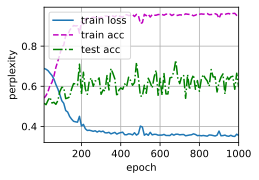

In [454]:
import math
train_ch8(model, train_iter, test_iter, corpus, lr, num_epochs, device)

In [ ]:
# # train_iter = seq_data_iter_sequential(corpus, 10, 20)
# for X, Y in train_iter:
#   print(X.shape)
#   print(Y.shape)
#   break

torch.Size([10, 20, 768])
torch.Size([200, 768])


In [ ]:
# for X, Y in seq_data_iter_sequential(corpus, 10, 20):
#   print(X.shape)
#   print(Y.shape)
#   break

In [ ]:
# lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 
# # 

### 决策树 n_estimators=200, max_depth=10, random_state=0
Result: 0.59

Total of # 3546 test cases

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.27      0.38      1670
           1       0.57      0.85      0.68      1876

    accuracy                           0.58      3546
   macro avg       0.59      0.56      0.53      3546
weighted avg       0.59      0.58      0.54      3546



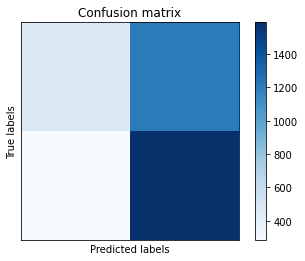

50.14355778694153


In [ ]:
import time
st = time.time()
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0)
model.fit(bert_w2vec_X_train, y_train)
predicted = model.predict(bert_w2vec_X_test)
print("Total of # {} test cases".format(len(y_test)))
calculate_confusion_matrix_and_report(predicted, y_test)
print(time.time() - st)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[ 457, 1213],
       [ 286, 1590]])

Total of # 3546 test cases

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.27      0.38      1670
           1       0.57      0.85      0.68      1876

    accuracy                           0.58      3546
   macro avg       0.59      0.56      0.53      3546
weighted avg       0.59      0.58      0.54      3546



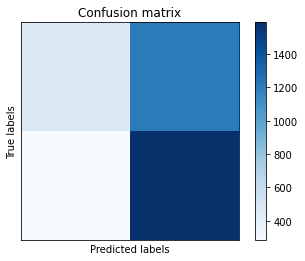

In [ ]:
predicted = model.predict(bert_w2vec_X_test)
print("Total of # {} test cases".format(len(y_test)))
calculate_confusion_matrix_and_report(predicted, y_test)

### 决策树训练集0.77准确率

Total of # 14180 train cases

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.82      0.86      6678
           1       0.85      0.94      0.89      7502

    accuracy                           0.88     14180
   macro avg       0.89      0.88      0.88     14180
weighted avg       0.88      0.88      0.88     14180



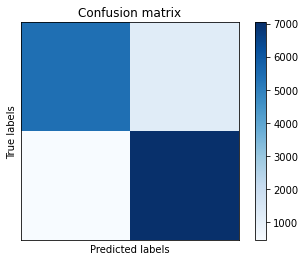

In [ ]:
predicted = model.predict(bert_w2vec_X_train)
print("Total of # {} train cases".format(len(y_train)))
calculate_confusion_matrix_and_report(predicted, y_train)

### XGB n_estimators=100, max_depth=3, random_state=0

Total of # 3546 test cases

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.33      0.41      1670
           1       0.56      0.75      0.64      1876

    accuracy                           0.55      3546
   macro avg       0.55      0.54      0.52      3546
weighted avg       0.55      0.55      0.53      3546



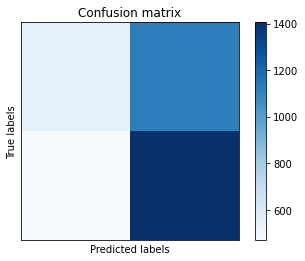

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0)
model.fit(bert_w2vec_X_train, y_train)
predicted = model.predict(bert_w2vec_X_test)
print("Total of # {} test cases".format(len(y_test)))
calculate_confusion_matrix_and_report(predicted, y_test)

### XGB n_estimators=100, max_depth=5, random_state=0
Result: 0.58 Time: 251

Total of # 3546 test cases

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.41      0.47      1670
           1       0.57      0.70      0.63      1876

    accuracy                           0.56      3546
   macro avg       0.56      0.55      0.55      3546
weighted avg       0.56      0.56      0.55      3546



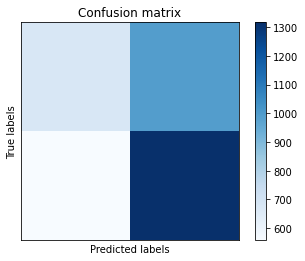

87.92139196395874


In [ ]:
import time
from xgboost import XGBClassifier
st = time.time()
model = XGBClassifier(n_estimators=100, max_depth=5, random_state=0)
model.fit(bert_w2vec_X_train, y_train)
predicted = model.predict(bert_w2vec_X_test)
print("Total of # {} test cases".format(len(y_test)))
calculate_confusion_matrix_and_report(predicted, y_test)
print(time.time() - st)

### XGB n_estimators=100, max_depth=10, random_state=0
Result: 0.59 Time: 506

Total of # 3546 test cases

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.46      0.50      1670
           1       0.58      0.67      0.62      1876

    accuracy                           0.57      3546
   macro avg       0.56      0.56      0.56      3546
weighted avg       0.57      0.57      0.56      3546



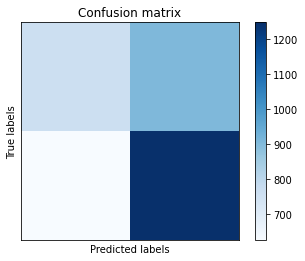

177.4775311946869


In [ ]:
import time
from xgboost import XGBClassifier
st = time.time()
model = XGBClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(bert_w2vec_X_train, y_train)
predicted = model.predict(bert_w2vec_X_test)
print("Total of # {} test cases".format(len(y_test)))
calculate_confusion_matrix_and_report(predicted, y_test)
print(time.time() - st)

### n_estimators=200, max_depth=5, random_state=0
Result: 0.58 Time: 493

Total of # 3546 test cases

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.45      0.49      1670
           1       0.58      0.68      0.62      1876

    accuracy                           0.57      3546
   macro avg       0.57      0.56      0.56      3546
weighted avg       0.57      0.57      0.56      3546



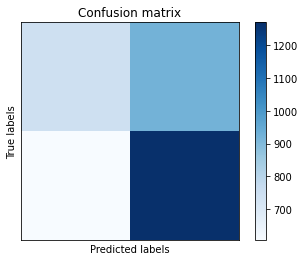

173.42756056785583


In [ ]:
import time
from xgboost import XGBClassifier
st = time.time()
model = XGBClassifier(n_estimators=200, max_depth=5, random_state=0)
model.fit(bert_w2vec_X_train, y_train)
predicted = model.predict(bert_w2vec_X_test)
print("Total of # {} test cases".format(len(y_test)))
calculate_confusion_matrix_and_report(predicted, y_test)
print(time.time() - st)